Son değiştirilme tarihi:**31.10.2024**



# Ön ayarlar ve kurulumlar

Şu uyarıyı durdurmak için ipython downgrade ediorum, umarım ilerde buna gerek kalmaz:

> DeprecationWarning: should_run_async will not call transform_cell automatically in the future. Please pass the result to transformed_cell argument and any exception that happen during thetransform in preprocessing_exc_tuple in IPython 7.17 and above.

In [ ]:
!pip -q install ipython==7.16.1

In [ ]:
# Bir de içinde birsürü **frozen** geçen satır çıkıyor, bunlar çıkmasın diye uzaya gönderiyoruz
import sys
import os

# Redirect stderr to /dev/null to suppress warnings
sys.stderr = open(os.devnull, 'w')

# sonra geri açmak için
# sys.stderr = sys.__stderr__

Bu notebooktan tam verim almak için <a href="https://nbviewer.org/github/VolkiTheDreamer/PythonRocks/blob/master/Machine%20Learning/Supervised/E2E_Classification_ML_Main_Concepts_Part_I.ipynb">Uçtan Uca ML notebookuyla</a> birlikte incelenmesini öneriyorum. Ve ayrıca <a href="https://github.com/VolkiTheDreamer/PythonRocks/tree/master/mypyextj">kendi modüllerimden oluşan paketimi</a> de indirmeniz gerekmektedir. Bunun sebebi, sizi gereksiz kod kalabalığı ile yormak istemeyip dikkatinizi sadece buradaki ana konuya toplamaktır. Kodları isterseniz ayrıca inceleyebilirsiniz. İndirmek için şu adresi kullanın: https://minhaskamal.github.io/DownGit/#/home.

Ayrıca sık sık <a href="Linear%20Regression.ipynb">Lineer Regresyon</a> notebookuma da referansta bulunacağım.

In [ ]:
#Önce bu
from google.colab import drive
drive.mount("/content/drive/")

#sonra da bu:benim custom paketin olduğu folder'ı nereye koyduysanız onu path'e ekliyoruz
import sys
sys.path.insert(0,'/content/drive/MyDrive/Programming/PythonRocks/')

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
!pip -q install ipython-autotime
%load_ext autotime

In [15]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# prompt: i will work with pandas-flavor and forbiddenfruit librarries. which version of numpy and pandas should i install

# !pip -q install numpy==1.21.6 --force-reinstall
# !pip -q install pandas==1.5.0 --force-reinstall
# !pip -q install pandas-flavor
# !pip -q install forbiddenfruit

In [16]:
import numpy as np
import pandas as pd
np.__version__
pd.__version__

'2.3.5'

'2.3.3'

In [ ]:
# !pip -q install -U numpy pandas matplotlib seaborn

# Gerekli kütüphanelerin import edilmesi

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#preprocessors, hepsini kullanmayabiliriz, ben nolur nolmaz diye hepsini topluca import ediyorum
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,StratifiedKFold,RepeatedKFold,RepeatedStratifiedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer,KNNImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import VarianceThreshold,SelectKBest, chi2, f_classif, mutual_info_classif,RFE,RFECV

In [19]:
from mypyext import dataanalysis as da
from mypyext import extensions
from mypyext import ml

# Şablon

Algoritmaları anlatırken aşağıdaki şablona göre gitmeye çalışacağım:

- **Teori**:
    - Algoritmanın kısa tanımı ve nasıl çalıştığı
    - Çözülmeye çalışılan problemin detayı
    - Manuel implementasyon: Hazır kütüphane olmadan kendimiz nasıl kodlardık(Bu her zaman bulunmayabilir)    
    - Varsayımlar/Ön kontroller: Bu algoritmayı kullanmak için hangi şartların sağlanması gerekir
    - Önemli hususlar: bunun içinde algoritmanın nelere duyarlı olduğu, özellikle nelere dikkat edilmesi gerektiği ve (hyper)parametrelerde özellikle dikkat edilmesi gereken hususlar olacak. Ayrıca alogritmanın özellikle iyi olduğu alanlar varsa bunlara da bu başlıkta değineceğiz
    
- **Kod pratiği/Örnekler**: Konuyu pekişitrmek adına bir veya birkaç örnek. Konular ilerledikçe örnek sayısı azalabilir. Sırayala okunacağını düşünerek konununu pekişmesi adına ilk başlarda daha fazla örnek olabilir.
- **Kaynaklar**: En sonda toplu olarak bulunmakla birlikte, yer yer aralarda da gerektiği durumlarda linkler verilecektir.

# Teori

##  Nedir? Nasıl çalışıyor? Nerde/Niçin kullanılır?

Logistic Regresion(LogReg), bir sampleın hangi sınıfa/labela ait olduğunu tahmin etmeye çalışan, en temel algoritmalardan bir tanesidir. Bunu, lineer regresyondaki(LinReg)'nin aksine lineer bir fonksiyonla değil de, **non-lineer **bir fonksiyon olan **logit** fonksiyonu kullanarak hesaplar.

LogReg tanıtılırken çoğunlukla şöyle anlatılır: *LogReg, adında Regression geçmesine rağmen bir regresyon algoritması değildir, classification algoritmasıdır*. Sonra başkaları bunu düzeltir ve der ki *Hayır, aslında bu lineer bir modeldir, zaten sklearn içinde de linear_model modülü içinde yer alır*. Evet, doğrudur, bu bir lineer modeldir, tıpkı LinReg'da olduğu gibi betalar yani katsayılar vardır ve lineer bir desicion boundary'si vardır. Devam edelim; Sonra başka bir kaynak der ki, *Evet her ne kadar arka planda bu bir lineer modelse de, sonuçta bir classification algoritmasıdır.*

Hadi bu karmaşaya bi son verelim. **Bu algoritmanın yaptığı, bir veri setindeki kayıtları sınıflandırmak değil, bunların belirli bir sınıfa ait olma olasılığını bulmaktır**; sınıflandırma kısmı biz son kullanıcılara kalır. Belirlediğimiz thresholda göre sınıfı biz belirlemiş oluruz. Özetle LogReg, `classification(sınıflandırma) amaçlı kullanılan linear bir modeldir ve özünde bir regresyon algoritmasıdır.` <a href="https://towardsdatascience.com/how-are-logistic-regression-ordinary-least-squares-regression-related-1deab32d79f5">Şuraya</a> da bi bakın derim.

Logistic kelimesi `logit` fonksiyonundan geliyor, bildiğimiz lojistikle(taşımacılık, mal temini v.s) bi alakası yok. Bu model de <a href="Linear Regression.ipynb">LinReg</a> gibi inputların ağırlıklarını hesaplar, ancak bunları doğrudan çıktı olarak vermek yerine bunları bu logit fonksiyonuna göndererek 0-1 arasında bir olasılık hesaplatır. Olasılıkları doğrudan kullanmak yerine log'unun kullanılması bir olayın olma olasılığı ile olmama olasılığı arasında simetri yakalama amacıyladır. Aşağıdaki videolardan birinde bunu daha iyi anlayacaksınız. Ben de biraz aşağıda bu konulara değineceğim.

LogReg, en temel algoritmalardan biri olup, aynı zamanda çoğu durumda ilk başta denenmesi gerekenlerdendir. Birçok kullanım alanı olmakla birlikte tipik olarak "mail spam mi değil mi", "bu hücre kanser hücresi mi değil mi", "bu işlem fraud işlemi mi değil mi" gibi binary classification(yani 1/0, True/False, Yes/No) problemlerinde kullanılır, bununla birlikte multi-class classification da yapılabilmektedir.

Evet şimdi tanımlarda biraz daha derine inmeden, aşağıdaki videoları izleyelim, ama mutlaka izleyelim.

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('yIYKR4sgzI8')
# YouTubeVideo('ARfXDSkQf1Y')
# YouTubeVideo('8nm0G-1uJzA')
# YouTubeVideo('vN5cNN2-HWE')
# YouTubeVideo('BfKanl1aSG0')
# YouTubeVideo('xxFYro8QuXA')

DİKKAT: Dedik ki, bu algoritma sadece bir olasılık hesaplar. Sklearn default olarak bu olasılık %50 üzerindeyse bir instanceı ilgili sınıfa sokar. Ama bu çok doğru bi yaklaşım değildir. Başka sık yapılan bir hata da threshold olarak prior probability kullanmak, yani bir sınıfın toplam küme içindeki oranını kullanmaktır, ki bu da çok doğru bi yaklaşım değildir. Burda thresholdu iş problemine göre kendimiz belirlemeliyiz. Bunla ilgili detay açıklamaları ve örneği <a href="E2E_Classification_ML_Main_Concepts_Part_I.ipynb">Uçtan Uca ML projesi notebookunda</a> bulabilirsiniz.

## Çözülecek problem

Burdaki soru şudur: Elimizdeki prediktörleri kullanarak bir instance'ın hangi sınıfta olma olasılığını modelleyebilir miyiz?

Logistic Regression'da bu soruya vereceğimiz cevap bizi Deep Learning'i(DL) de anlamaya yaklaştırackatır. Göreceksiniz, LogReg'in mantığı DL'in mantığına ne kadar benziyor. Zira burada da elimizdeki feature değerlerini bir aktivasyon fonksiyonuna(sigmoid) sokma var, DL'de de; keza burda da optimizasyon yöntemi olarak Gradient Descent kullanılıyor, DL'de de. DL ile ilgilenmeyi düşünüyorsanız LogReg'i ve onun temelinde yer alan logit/sigmoid fonksiyonlarını, cost functionları ve gradient descent'i anlamak çok önemli.

### Logit ve sigmoid fonksiyonları

Şimdi, x'leri kullanarak bir Y olayı olur mu bunun olaslığını bulmak istiyoruz. İlk olarak klasik LinReg benzeri bir eşitlikle ilerlemeyi deneyelim.

$$P(Y=1|X)= p=\beta_0 + \beta_1x$$

Burda bi sıkıntı var, zira eşitliğin sağ tarafı herhangi bi değer(-inf ile +inf arasında) alabilir, halbuki bize pozitif bi değer lazım, zira olasılık denen şey pozitif bir değerdir. O zaman yukarıdaki gibi değil de exponansiyel bir denklem mi arasak?, $e^{\beta_0+\beta_1x}$ gibi. Bu işimizi görür sanki ama bunda da bir sıkıntı var, ki bu da artı sonsuza kadar gidiyor, bize 0-1 arası değer lazım. O zaman bunu aşağıdaki gibi ifade edelim. Böylece hem pozitif hem 0-1 arası değer elde ederiz.

$$\large p=\frac{e^{\beta_0+\beta_1.x}}{1+e^{\beta_0+\beta_1.x}}$$

Burada karşımızda `odds` kavramı çıkıyor. O da şöyle hesaplanır:<br><br>

$$\large odds=\frac{\text{bir olayın olma olasılığı}}{\text{bir olayın olmama olasılığı}}=\frac{P(Y=1)}{P(Y=0)}=\frac{p}{1-p}$$

Yukardaki kutudaki değerleri yerine koyarsak, odds şöyle çıkar:

$$\large e^{\beta_0+\beta_1.x}$$

Şimdi örnek probabilityler(p) üzerinden gidelim.

In [20]:
p=np.array([0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.999, 0.9999, 1]) #eventin olma olasılığı
notp=np.array(p[::-1]) #eventin olmama olasılığı
odds=p/notp

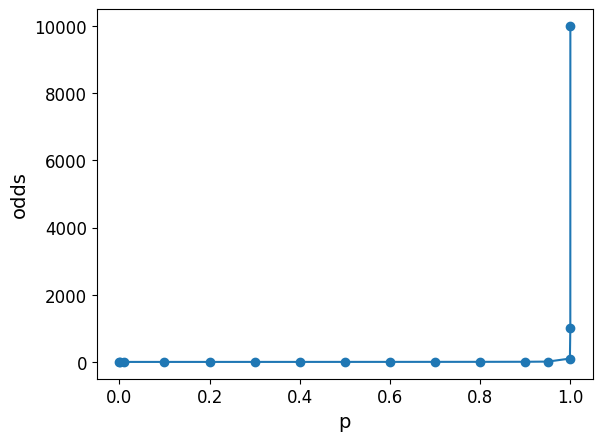

In [21]:
plt.plot(p,odds,"o-")
plt.xlabel("p")
plt.ylabel("odds");

Burda olayın olma olasılığı arttıkça odds ratio'nun da astronomik seviyelere çıktığını görüyoruz. Yani bir asimetriklik var. Bunu düzeltmek lazım. Nasıl? İki tarafın da log'unu alarak. odds'un logunu aldığımızda karşımıza çıkan fonksiyon `logit fonksiyonu` oluyor işte. Bu sayede karşımızda çıkan katsayıların yorumlanması daha kolay olacaktır, zira artık elimizde lineer bir denklem vardır.

$$\large odds=\frac{p}{1-p} \;\;\;\;\;\text{-----log alalım---->}\;\;\;\;\; ln(odds)=ln(\frac{p}{1-p}) = ln(e^{\beta_0+\beta_1x})=\beta_0+\beta_1x$$

Farkettiyseniz logit fonksyionun sonucu yine p'nin kendisi oluyor.

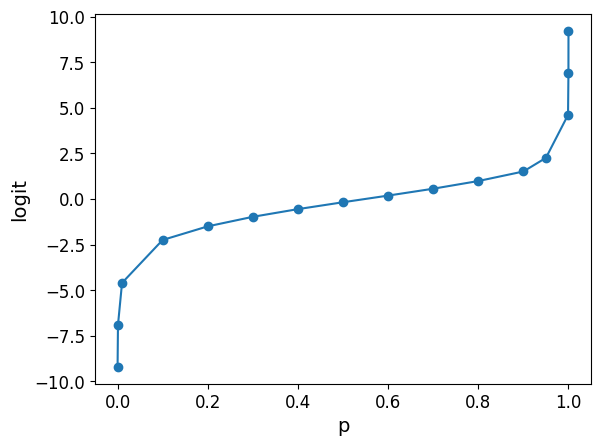

In [22]:
logit=np.log(odds)
plt.plot(p,logit,"o-")
plt.xlabel("p")
plt.ylabel("logit");

Artık elimizde lineer bir denklem var. X, 1 birim arttıkça Y'nin logiti $\beta_1$ kadar değişir.

Şimdi son olarak sınıf olasılıklarını bulmak için bu logit fonksiyonun da aşağıdaki gibi tersi alınır, ki buna da `sigmoid function` denir. Burda x ve y arasındaki ilişki non-lineer olmuştur.

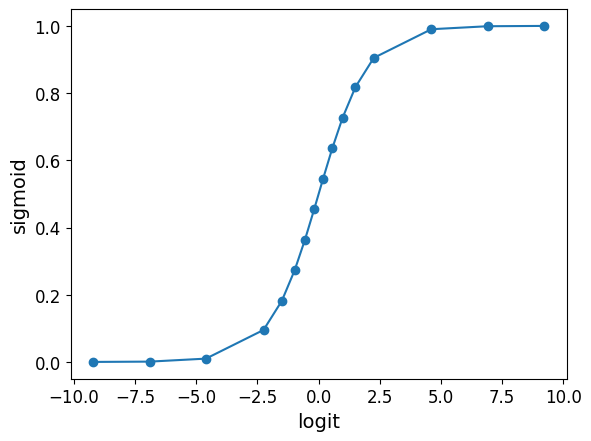

In [23]:
sigmoid=1/(1+np.exp(-logit))
plt.plot(logit,sigmoid,"o-")
plt.xlabel("logit")
plt.ylabel("sigmoid");

Şimdi $\beta_0+\beta_1x$ denklemimizi düşündüğümüzde burdaki betaları nasıl bulacağız? Esas **çözülecek problem** budur. En küçük kareler yöntemini(OLS) kullanamayız, çünkü ilişki lineer değil. Bu sefer `Maximum Likelihood Estimation(MLE)` metodunu kullanacağız ve bunu maksimize eden katsayıları bulmaya çalışacağız. Yani karşımızda yine bir optimizasyon görevi var.

Şimdi hesapları yapalım:

$$\large P(Y=1\;|\;x)= \frac{1}{1+e^{-(\beta_0+\beta_1x)}} = F_\beta(x)$$
<br>

$$\large P(Y=0\;|\;x)= 1 - F_\beta(x)$$

<p>Tek bir instance(gözlem) için likelihood tahmini genelleştirilmiş haliyle şöyle olur</p><br>

$$\large P(Y=y\;|\;x)= [F_\beta(x)]^y.[1-F_\beta(x)]^{1-y}$$

Burda y'ler gerçek değerler iken $F_\beta$'lar tahmini değerlerdir. Tüm instanceler için bu olasılıklar aşağıdaki gibi çarpılır ve nihai Likelihood fonksiyonu elde edilir.<br>

$$\large  L = \prod_{i=1}^N[F_\beta(x)]^{y_i}.[1-F_\beta(x)]^{1-{y_i}}$$

Bu çarpım işlemi, işleri karmaşıklaştırır, üstelik bilgisayar belleği için de yüktür. Biz yine her iki tarafın logunu alalım, o yüzden fonksiyonumuzun adı artık Likelihood değil `Log Likelihood` olur. Log aldığımızda neler olacağını bi hatırlayalım,

$$log(a^b)=b.log(a)\;\; ve \;\;log(a.b)= log(a)+log(b)$$

ve sonuç

$$\large  log(L) = LL = \sum_{i=1}^N[{y_i}.log(F_\beta(x)^i) + (1-{y_i).log(1-F_\beta(x)^i)]}$$

veya

$$\large  LL = \sum_{i=1}^N[{y_i}.log(p_i) + (1-{y_i).log(1-p_i)]}$$


Bu nihai fonksiyona **cross entropy** adı verildiğini de görebilirsiniz. Bunun binary case için özel hali ise **binary cross entropy** olup aşağıdaki gibidir.

$$\large  LL = \sum_{i=1}^N{y_i}.log(p_i)$$

Bir adımımız daha kaldı o da, maximize edilmeye çalışılan bu fonksiyonu minimize etmeye çalışmak. Bunun için de başına bir "-" konur.

$$\large  Negatif Log Likelihood = NLL = -\sum_{i=1}^N{y_i}.log(p_i)$$

Nihai fonksiyonumuz negatif işaretlidir, bu artık bir **cost function** olmuştur. **iterasyon** ile bu maliyet fonksiyonunu minimize etmeye çalışacağız. Bunun için de `Gradiend Descent(GD), Stokastik GD, Newton metodu` gibi metodlar var. Biz burada GD'ye bakacağız.

Şimdi öncelikle GD öncesine kadarki olan kısmı, yani yukarıda anlattıklarımızı bir de şematik olarak görelim.

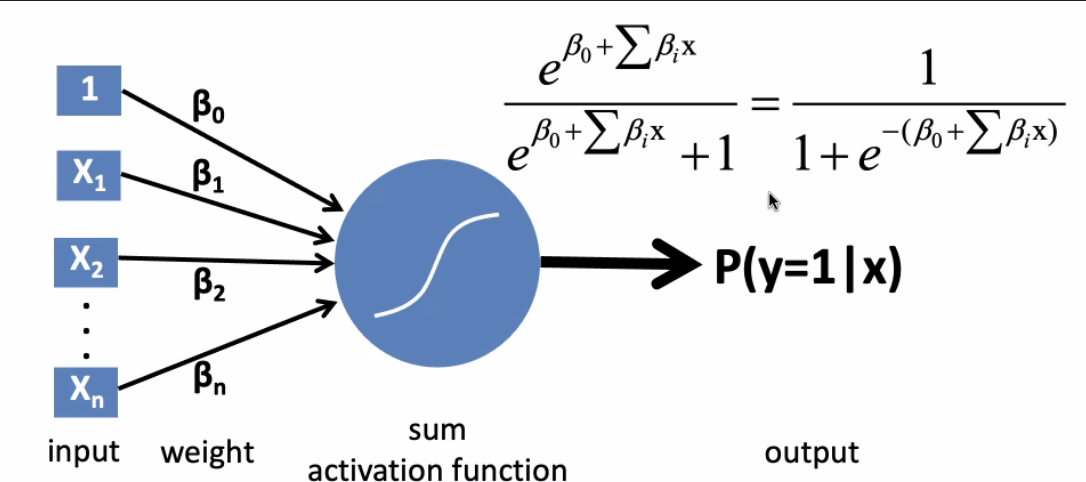
<p style="font-size:smaller;text-align:center">Görsel: H.S Ölmez - Sabanci University</p>

Veya Kaggle master Kaan hocamızın <a href="https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners#Logistic-Regression">gösterdiği</a> gibi beta yerine weight anlamında w'ler de kullanılabilir, ki bu şematik gösterim Neural Networks(Sinir Ağları/Derin Öğrenme) anlatımında da karşımıza çıkacak.

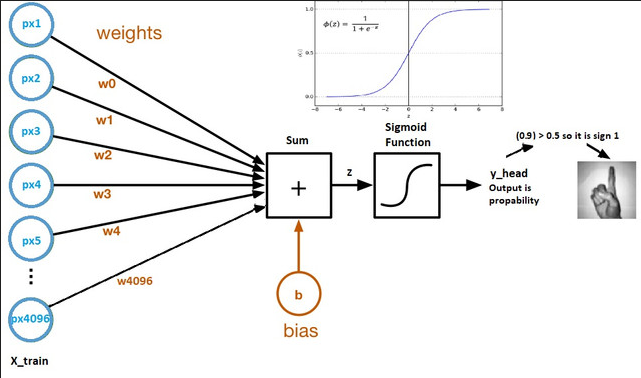

### Gradient Descent

Bunu LinReg notebookunda görmüştük, oraya tekrar bakabilirsiniz. Regresyon değil de classification bağlamında görmek için Kaan hocamızın yine yukarıdaki linkine bakabilirsiniz. Bunlara ek olarak aşağıdaki linklerden de gerek GD detayını gerek manuel implementasyonu görebilirsiniz.

- https://towardsdatascience.com/logistic-regression-explained-and-implemented-in-python-880955306060
- https://realpython.com/logistic-regression-python/

"Bana kısaca sen anlat" diyenler için şöyle özetleyeyim.

- Öncelikle "katsayıların ilk değerlerine ne verelim" sorusuyla başlanır. Bunun için bazı teknikler var, diyelim ki 0.01 verdik ve $\beta_0$(bias) için de 0 dedik.(Not: Neural Networklerdekinin aksine LogReg'de ağırlıklar 0 verilerek başlatılabilir)
- x'ler ile betalar(weightler) çarpılır ve toplanır. Çıkan sonuç, bir aktivasyon fonksiyonu olan sigmoid fonksiyonuna sokulur. Diyelim ki eğitim setinde bir instance'ın classını 0(not-churn/not-spam v.s) tahminledik ve gerçekten de 0'mış(veya 1 dedik ve gerçekten 1 çıktı), o zaman kaybımız(`loss`) 0'dır. Bu işlemin, yani tahminle gerçek değer arasındaki farkın hesaplanma sürecinin, adı **forward propagation**'dır.
- Tüm instancelar için bu loss'ların toplamına da `cost` deniyor. Nihai amaç, cost'un minimize olması.
- Sonra başa dönüp betalar ve bias güncellenir, ki buna da **backward propagation** denir. Güncelleme işlemi de türev alarak gradient descent yöntemiyle yapıyoruz, ta ki eğim(yani türev) 0 olana kadar.

### Cost function olarak LogLoss(binary cross entropi)

Cost functionımız yukarıdaki negatif log-likelihood veya diğer adıyla binary cross entropi fonksiyonudur. Buna negative log loss da denmektedir. Yukarıda bahsedilen tüm proses boyunca bu metrik minimize edilmeye çalışılır.

$$\large  Negatif Log Likelihood = NLL = -\sum_{i=1}^N{y_i}.log(p_i)$$

Denklemden görüldüğü üzere, gerçek sınıf 1 iken eşitliğin ikinci kısmı uçuyor, 0 iken de ilk kısmı. Bu denklemin bir güzelliği de, yanlış tahmini ne kadar kendinden emin bi şekilde yaparsak(yani olasılığımız ile gerçeklik arasındaki fark ne kadar çok açıksa) bunun daha fazla cezalandırılmasıdır. Mesela aşağıdaki örneğe bakalım,

In [24]:
prd=[0.99, 0.99, 0.01, 0.01] #tahmin olasılıkları
act=[1, 0, 1, 0] #gerçek değerler

for i in range(len(act)):
    logloss=-(act[i]*np.log(prd[i])+(1-act[i])*np.log(1-prd[i]))
    normalloss=np.abs(act[i]-prd[i])
    print(f"actual:{act[i]}, True olasılığı:{prd[i]:.2f}, logloss:{logloss:.2f}, normalloss:{normalloss:.2f}")

actual:1, True olasılığı:0.99, logloss:0.01, normalloss:0.01
actual:0, True olasılığı:0.99, logloss:4.61, normalloss:0.99
actual:1, True olasılığı:0.01, logloss:4.61, normalloss:0.99
actual:0, True olasılığı:0.01, logloss:0.01, normalloss:0.01


Aşağıda daha detaylı bilgiler edinebilrsiniz ancak özet olarak şunu söyleyebiliriz. Regresyon analizlerinden genelde SSE(Sum of Squared Errors), classficationda ise Log Loss/CrossEntropy Loss optimize edilmeye çalışılır. Tabi classficationda classlara farklı ağırlıklar vererek bu cost functionları modifiye etmek de mümkündür. Bunun nasıl yapıldığını <a href="E2E_Classification_ML_Main_Concepts_Part_II.ipynb">Uçtan uca ML projesinde</a> görebilirsiniz.

Bu konu da önemli bir konu olup ilave okumalar yapmanızı öneririm

- https://towardsdatascience.com/cross-entropy-negative-log-likelihood-and-all-that-jazz-47a95bd2e81
- https://towardsdatascience.com/intuition-behind-log-loss-score-4e0c9979680a
- https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
- https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23
- https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3
- https://www.analyticsvidhya.com/blog/2019/08/detailed-guide-7-loss-functions-machine-learning-python-code/
- https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression/
- https://www.data4v.com/log-loss-as-a-performance-metric/
- https://medium.com/konvergen/cross-entropy-and-maximum-likelihood-estimation-58942b52517a
- https://medium.com/@phuctrt/loss-functions-why-what-where-or-when-189815343d3f
- https://algorithmia.com/blog/introduction-to-loss-functions
- https://towardsdatascience.com/understanding-sigmoid-logistic-softmax-functions-and-cross-entropy-loss-log-loss-dbbbe0a17efb
- https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
- http://www.awebb.info/probability/2017/05/18/cross-entropy-and-log-likelihood.html

Son olarak şunu da söylemekte fayda var. GridSearch içinde de scoring parametresine de accuracy/precision gibi metriclere ek olarak **neg_log_loss** da verebiliyoruz. Yani neg_log_loss hem Logistic Regresyonunu optimize etmeye çalıştığı bir **fonksiyondur** hem de bir **evaluation metriğidir**. Daha detay bilgi için <a href="E2E_Classification_ML_Main_Concepts_Part_I.ipynb">Uçtan uca ML projesi(PartI)</a> içinde GridSearch bölümündeki Önmeli Husulara bakabilirsiniz.

## Manuel Implementasyon

Manuel implementasyonu Kaan hocamızın <a href="https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners#Logistic-Regression"> Kaggle sayfasında</a> bulabilirsiniz.

## Varsayımlar

- LinReg'in aksine Residual'ların normal dağılımı ve homoscdedasticity gerekmez
- LinReg'in aksine prediktör ve target arasında Lineer ilişki gerekmez
- LinReg'de olduğu gibi featurelar arasında multicollinearity, featureların  öneminin yorumlanmasında sorun teşkil edebilir
- LinReg'de olduğu gibi instanceların birbirinden bağımsız olması beklenir
- LinReg'de olduğu gibi featureler arasında collinearity olmaması gerekir(Tahmin sonucunu değiştirmez, ama featureların önemini yorumlamada önemlidir)--> bunla ilgili kaynaklara <a href="Linear Regression.ipynb">LinReg</a> notebookundan bakabilirsiniz.
- Instance sayısı feature sayısının en az 10-15 katı olmalıdır

## Önemli husular

**Genel**
- Çok kritik bi detay değil ama mülakatlarda çıkabilir diye tekrar belirtmekte fayda var: Sınıflandırma algoritması değildir, sınıflandırmada kullanılan lineer regresyon algoritma türüdür
- fit çizgisi S şeklindedir, ama decision boundry lineerdir
- Maximum Likelihood(MLE) maximize edilmeye çalışılır(veya negative log likelihood cost function minimize edilemesi)
- Target'ı LabelEncode etmeye gerek yoktur
- Data linearly separable durumdaysa, MLE fonksiyonu sınıflar arasındaki ayrımı ortaya koymak için katsayıların gittikçe büyümesine neden olur. Bunu önlemek için **Penalty** kullanmak gerekir. Bu regülarizasyon cezasının seviyesini belirlemek için de lambda(sklearn'de bunun tersi olan "C" var) değeri kullanılır. Daha yüksek lambda(yani daha düşük C), daha güçlü regülarizasyon demektir. Bu değer, deneme yanılmayla optimize edilir.
- defaultu binary classfication içindir ama multi_class parametresi **multinomial** yapılarak multi-class tahminleme yapılabilir.
- **SGDClassfication**: SGD, genel olarak bir optimizasyon yöntemidir. Bu anlamda, SGDClassifer da, regularizasyon içeren bir linear modelin SGD(Stochastic Gradient Descent) ile optimize edilmiş halidir. sklearn'de LogReg için böyle bir classifer var: SGDClassifier(alpha=k, penalty='l2', loss='log')


**Avantajlar**
- computation comlexity:O(nd), hızlı eğitilir.
- online/realtime kullanımı vardır.
- Interpretability'si yüksektir(katsayılar aracılığıyla)

**Dezavantajlar**
- İyi bir optimizasyon elde etmek için yüksek  sayıda veriye ihtiyaç duyar, az veride başarılı olmayabilir
- Outlierlara karşı duyarlıdır, dikkatlice ele alınması gerekir.
- Scaling'e duyarlıdır(Tahmin sonucunu değiştirmez, yorumlamada önemli)
- lineer decision boundry'si vardır. linearly sperable olmayan datalarda, ki çoğunlukla öyle olacaktır, performansı düşüktür. O yüzden de diğer algoritmalara göre genelde daha düşük bir accuracy vardır. Çoğunlukla ana model olmak yerine baseline/benchmark model olarak seçilir.

# Kod Pratiği

## Data temini, analizi(EDA) ve preprocessing

Titanic verisetini inceleyeceğiz, bu birçok eğitimde anlatılan bir veri setidir, ve <a href="https://www.kaggle.com/competitions/titanic/overview">Kaggle'da</a> da bulunmaktadır.

Çeşitli bilgileri verilen yolcuların hayatta kalıp kalmadığı bilgisi var. Bu bilgileri kullnarak bir model oluşturacağız ve yeni gelen veri setindeki bir kişinin hayatta kalıp kalmadığını tahmin etmeye çalışacağız.

**Önemli not**: İki ayrı veri seti verilmiş durumda. train ve test diye. Böyle iki parça halinde verilen setlerde genelde test setinde label olmaz, ve bunu bizim tahmin etmemiz, sonra da sonuçları bir yere yüklememiz istenir. Gerçek değerleri biz bilmeyiz, onlar bu verisetini yaratanların elindedir. Bu örnekte de durum böyle. Bu durum biraz kafanızı karıştırabilir. Şöyle yapalım, burdaki test setini saha verisi olarak düşünün. Biz okuyacağımız train verisini ise elimizdeki ana veri gibi düşünüp, onu yine kendi içinde train ve teste ayıracağız.

In [25]:
df=pd.read_csv("https://raw.githubusercontent.com/VolkiTheDreamer/dataset/master/Classification/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived kolonu bizim target kolonumuz,binary classification olacak. Kolonlarda şunlar açıklamaya ihtiyaç duyuyor, diğerleri zaten aşikar:

- pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- SibSp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- embarked: Port of Embarkation(C = Cherbourg, Q = Queenstown, S = Southampton)

In [26]:
df.shape

(891, 12)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## EDA

<a href="https://mvolkanyurtseven.medium.com/makine-%C3%B6%C4%9Frenimi-felsefesi-5-78cd290b46f2">Detaylı EDA</a>

### Genel

In [29]:
#mypyext paketimideki extensions modülündeki fonksiyon versiyon sorunları yaşadaığı için buraya elle yazdım
# def super_info_(df, dropna=False):
#     dt=pd.DataFrame(df.dtypes, columns=["Type"])
#     dn=pd.DataFrame(df.nunique(dropna=dropna), columns=["Nunique(Excl.Nulls)"])
#     nonnull=pd.DataFrame(df.isnull().sum(), columns=["#of Missing"])
#     firstT=df.head(1).T.rename(columns={0:"First"})
#     MostFreqI=pd.DataFrame([df[x].value_counts().head(1).index[0] if not df[x].isnull().all() else None for x in df.columns], columns=["MostFreqItem"],index=df.columns)
#     MostFreqC=pd.DataFrame([df[x].value_counts().head(1).values[0] if not df[x].isnull().all() else None for x in df.columns], columns=["MostFreqCount"],index=df.columns)
#     return pd.concat([dt,dn,nonnull,MostFreqI,MostFreqC,firstT],axis=1)

# super_info_(df)
df.super_info_()

,Type,Nunique(Excl.Nulls),#of Missing,MostFreqItem,MostFreqCount,First
PassengerId,int64,891,0,1,1,1
Survived,int64,2,0,0,549,0
Pclass,int64,3,0,3,491,3
Name,object,891,0,"Braund, Mr. Owen Harris",1,"Braund, Mr. Owen Harris"
Sex,object,2,0,male,577,male
Age,float64,89,177,24.0,30,22.0
SibSp,int64,7,0,0,608,1
Parch,int64,7,0,0,678,0
Ticket,object,681,0,347082,7,A/5 21171
Fare,float64,248,0,8.05,43,7.25


ilk gözlemlerimiz:

- null kolonlar var
- düşük ve yüksek <a href="https://en.wikipedia.org/wiki/Cardinality">kardinalitesi</a> olan kolonlar var
- full cardinalitesi olan 2 kolon var(id ve name), bunları sileriz(Belki Name'den Mr/Mrs gibi ünvanları da alabiliriz ama şuan buna odaklanmayalım)
- Ticket bilgisi anlamsız bi bilgi gibi duruyor, bunu da silebiliriz(Belki bundan bile bi anlam çıkartılabilir, ama yine bunu es geçelim)
- ordinal, numerik ve kategorik türlerin hepsi var
- Cabin bilgisinden anlamlı bir feature türetebilir miyiz(feature extraction) bi bakalım

In [30]:
#silinecekleri silelim
df.drop(["PassengerId","Name","Ticket"], axis=1, inplace=True)

Düşük kardinalitesi olanların değerlerine bakalım

In [31]:
da.getColumnsInLowCardinality(df)

Unique items in column Survived
[0 1]

Unique items in column Pclass
[3 1 2]

Unique items in column Sex
['male' 'female']

Unique items in column SibSp
[1 0 3 4 2 5 8]

Unique items in column Parch
[0 1 2 5 3 4 6]

Unique items in column Embarked
['S' 'C' 'Q' nan]

You may want to consider the numerics with low cardinality as categorical in the analysis


['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

Cabin bilgisine bakalım, (normalde nominal ve kardinalitesi düşük beklerdik)

In [32]:
df.Cabin.value_counts().head(10)

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
E101           3
C22 C26        3
F33            3
C83            2
C123           2
Name: count, dtype: int64

sanki ilk karakterlerini alıp gruplayabilriz gibi, belki de bunlar geminin belirli bir katını veya bloğunu gösteriyordur, ve belki atıyorum B ile başlayanların büyük çoğunluğu kurtulmuştur.

In [33]:
df["CabinGrup"]=df.Cabin.fillna("ZZZ").apply(lambda x:x[0]) #ZZ yapmazsak hata alırız
del df["Cabin"]

Şimdi veri türlerimizi belirleyelim.

In [34]:
target=["Survived"]
nums=["Age","SibSp","Parch","Fare"]
# cats=list(df.columns).removeItems_(nums+target,False) #extension metodum
cats=set(df.columns).difference(nums+target)
ords=["Pclass"]
noms=cats.difference(ords)

nums,cats,ords,noms

(['Age', 'SibSp', 'Parch', 'Fare'],
 {'CabinGrup', 'Embarked', 'Pclass', 'Sex'},
 ['Pclass'],
 {'CabinGrup', 'Embarked', 'Sex'})

### Visuals

#### Korelasyonlar

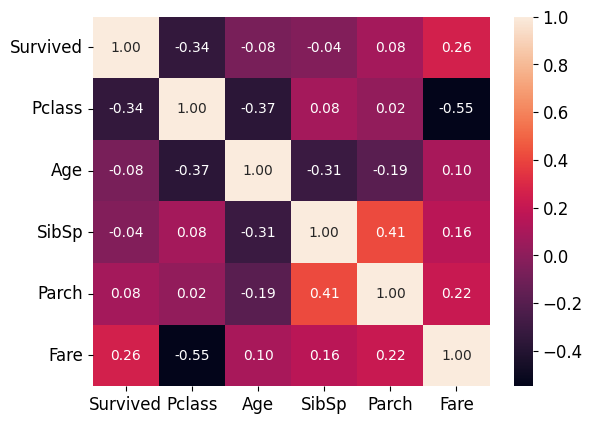

In [35]:
sns.heatmap(df.select_dtypes("number").corr(), annot=True, fmt=".2f");

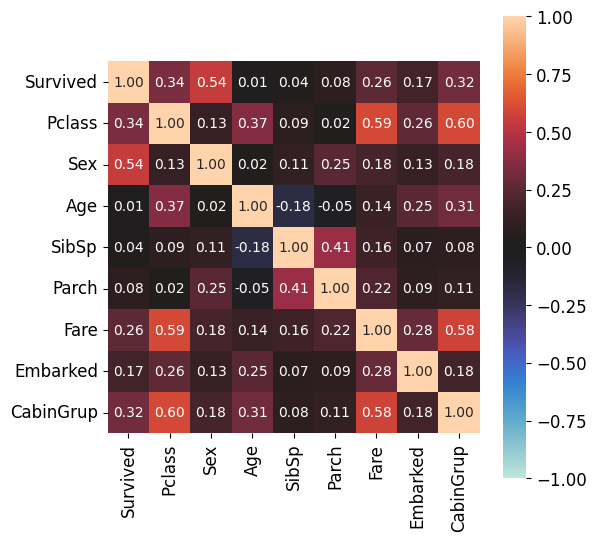

In [36]:
from dython.nominal import cramers_v, correlation_ratio, associations
corrdict=associations(df,nominal_columns=cats,numerical_columns=nums,figsize=(6,6))

Ödev: farklı veri tipleri arasındaki korelasyon değerlerinin değer skalası

Targetla en yüksek korelasyonu olan kolonlara bakalım. Gözle de görülüyor ama kodla da bakalım

In [37]:
corr_results=corrdict["corr"] #dataframe
da.getHighestPairsOfCorrelation(corr_results,"Survived",5)

Sex          0.540200
Pclass       0.336684
CabinGrup    0.320034
Fare         0.257307
Embarked     0.173099
Name: Survived, dtype: float64

Bu korelasyon değerlerinden feature selection aşamasında yararlanabiliriz.

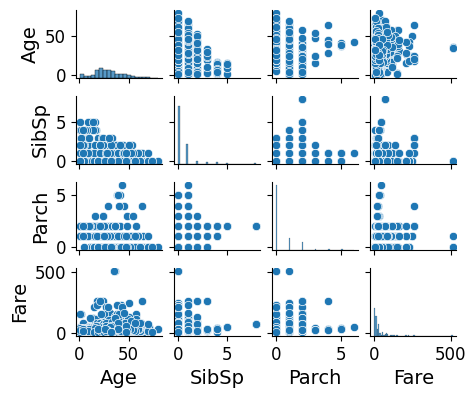

In [38]:
# Değişkenlerin dağılımlarına bakalım
sns.pairplot(df[nums],height=1, aspect=1.2);

- Diagonala bakıldığında Age dışındakiler skewed görünüyor, bunlardan SiSp ve Parch zaten küçük sayılar bi log transformasyona gerek yok ama Fare'de gerekli gibi
- Yine diagonaldakilerin kimisinde outlier da var gibi, boxplotla ayrıca bakarız
- kolonlar arası collinearity yok görünüyor

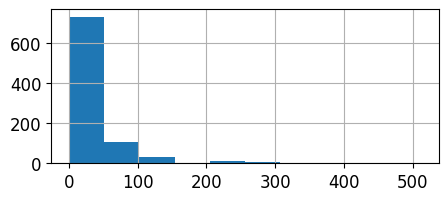

In [39]:
#transformasyon öncesi
df.Fare.hist(figsize=(5,2));

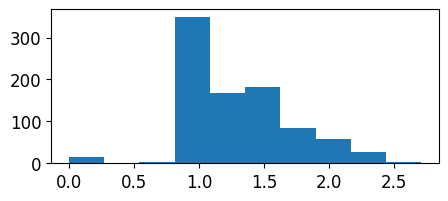

In [40]:
#transformasyon sonrası
plt.figure(figsize=(5,2))
plt.hist(np.log10(df.Fare+1));

Tam normal dağılım olmadı ama yine de scaling için yeterli gibi.

#### Outliers

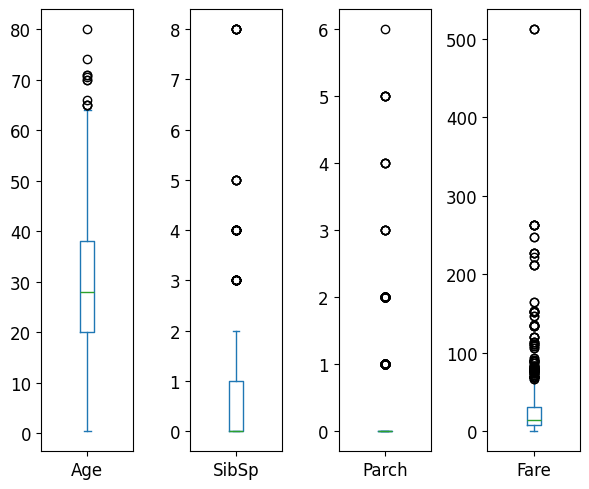

In [41]:
df[nums].plot(kind="box", subplots = True,figsize=(6,5))
plt.tight_layout();

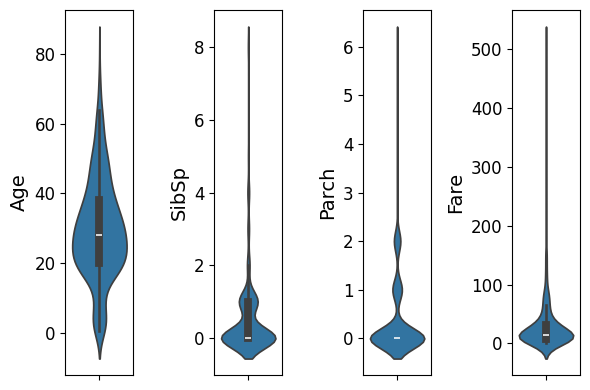

In [42]:
#violin ile de bakalım, çünkü bu grafik türü yoğunluk ve olasılık dağılımını gösterir
plt.figure(figsize=(6,4))
for e,n in enumerate(nums):
    plt.subplot(1,len(nums),e+1)
    ch=sns.violinplot(y=n, data=df)
plt.tight_layout()
plt.show();

In [43]:
#programatik oalrak da bakalım
da.outlierinfo(df,nums,imputestrategy="None",thresh=0.25)

Age, Min:0.42, Max:80.0, Q1:    20.12, Q3:    38.00, IQR:    17.88, Q3+1,5*IQR:    64.81, Q1-1,5*IQR:    -6.69, Mean within the box:    69.77, Total Mean:    29.70, Outliers:11

SibSp, Min:0, Max:8, Q1:     0.00, Q3:     1.00, IQR:     1.00, Q3+1,5*IQR:     2.50, Q1-1,5*IQR:    -1.50, Mean within the box:     4.37, Total Mean:     0.52, Outliers:46

Parch, Min:0, Max:6, Q1:     0.00, Q3:     0.00, IQR:     0.00, Q3+1,5*IQR:     0.00, Q1-1,5*IQR:     0.00, Mean within the box:     1.60, Total Mean:     0.38, Outliers:213

Fare, Min:0.0, Max:512.3292, Q1:     7.91, Q3:    31.00, IQR:    23.09, Q3+1,5*IQR:    65.63, Q1-1,5*IQR:   -26.72, Mean within the box:   128.29, Total Mean:    32.20, Outliers:116



In [44]:
da.outliers_IQR(df,nums,imputestrategy="None",thresh=0.25)

11 outliers exists in feature 'Age'
46 outliers exists in feature 'SibSp'
213 outliers exists in feature 'Parch'
116 outliers exists in feature 'Fare'


In [45]:
da.outliers_IQR(df,nums,imputestrategy="None",thresh=0.1)

46 outliers exists in feature 'SibSp'
1 outliers exists in feature 'Parch'
20 outliers exists in feature 'Fare'


Evet hepsinde outlier var, özellikle Fare'de. SizSp ve Parch her ne kadar outlier gösterse de bunlar outlier olarak ele alınmamalı, çünkü bunlar kişi sayısı ve çok da bir uç değer yok aslında.

In [46]:
# z score'a göre de bakalım
da.outliers_zs(df,nums,imputestrategy="None")

12 outliers exists in feature 'SibSp'
10 outliers exists in feature 'Parch'
17 outliers exists in feature 'Fare'


In [47]:
# standar sapmaya göre de bakalım
da.outliers_std(df,nums,imputestrategy="None")

2 outliers exists in feature 'Age'
30 outliers exists in feature 'SibSp'
15 outliers exists in feature 'Parch'
20 outliers exists in feature 'Fare'


Sonuç olarak, thresholdu 0.1 olan IQR yöntemi ile ilerleriz.

#### Null kontrolü

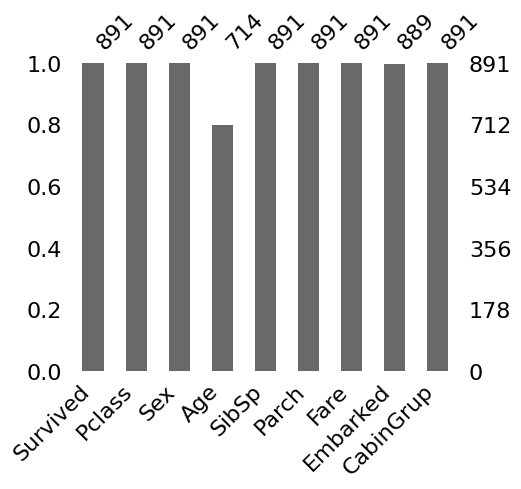

In [48]:
import missingno as msno
msno.bar(df, figsize=(5,4));

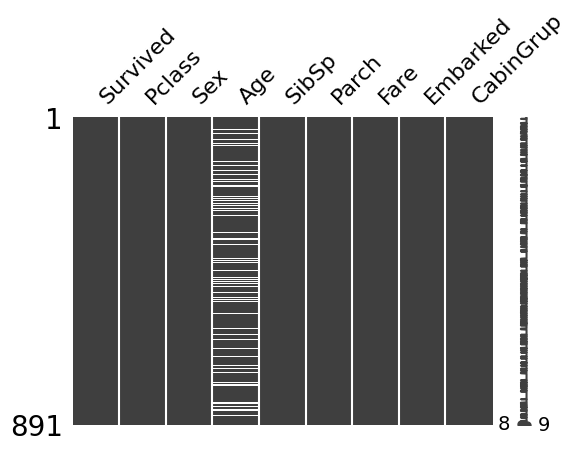

In [49]:
msno.matrix(df,figsize=(6,4));

In [50]:
# -1, -999, NA, Tanımsız gibi null yerien geçebilecek değerler var mı diye de bakalım
da.findNullLikeValues(df)

There are no null-like values
Don't forget to check for 0's manually


### Target bazlı analizler

Targetın dağılımına bakalım

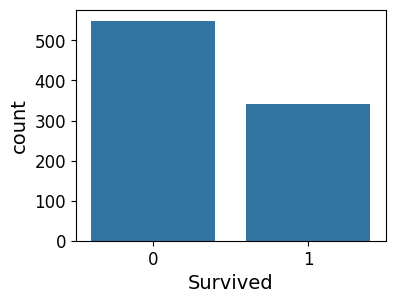

In [51]:
plt.gcf().set_size_inches(4,3)
sns.countplot(x=df["Survived"]);

In [52]:
df.Survived.value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Çok büyük olmamakla birlikte hafif bir imbalance sözkonusu.


Target bazında numeriklerin **ortalama** değerlerine bakalım.

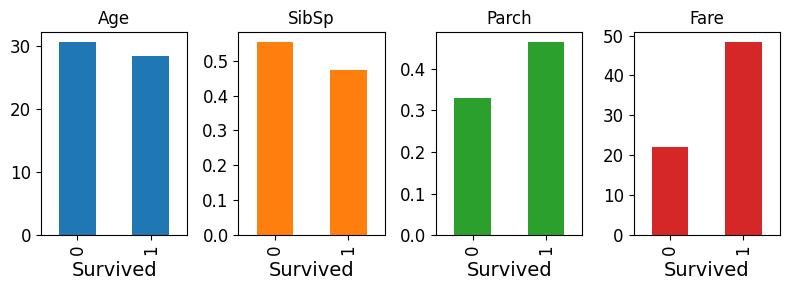

In [53]:
da.plotNumericsByTarget(df,"Survived",nums=nums,layout=(1,4),figsize=(8, 3))

Fare ve Parch, target bazında oldukça farkediyor, bunların feature importance'ı önemli olacak gibi duruyor. Korelasyon analizinde Fare için bu durumu gözlemlemiştik zaten ancak Parch için aynı durum sözkonusu değil. (Outlier varsa sonuçları yorumlamayı yanıltabilir, ki Fare'da oldukça büyük outlierlar vardı, o yüzden buradaki sonuçlara şuan çok da güvenmemekte fayda var)

Kategorik kolonlar üzerinden baktığımızda ilgili kategorilerdeki her bir değer için Surviving olasılıklarına(prior probability) bakalım.

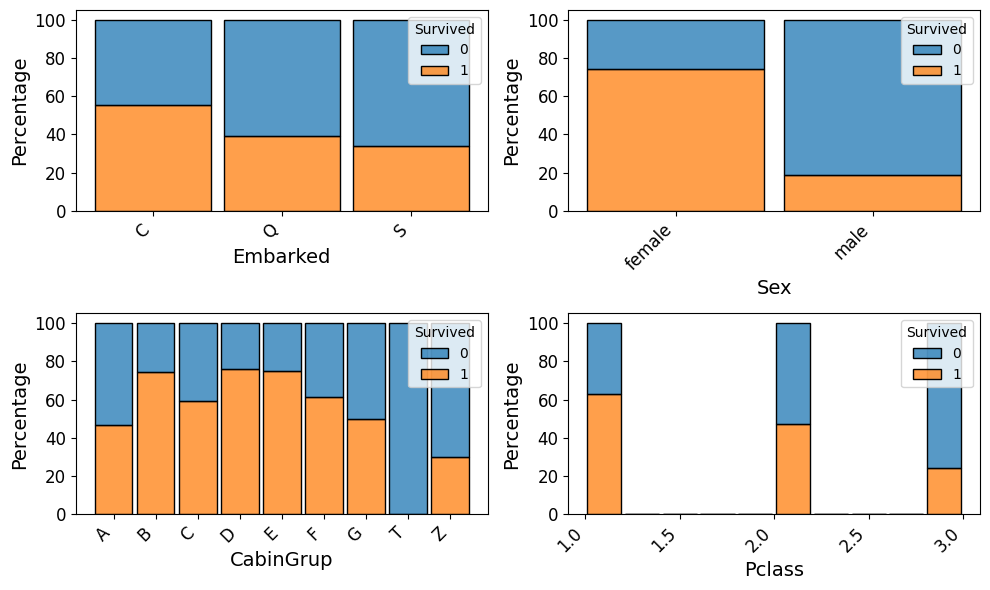

In [54]:
plt.figure(figsize=(10,6))
da.plotTargetByCats(df, cats, "Survived", subplot_tpl=(2,2));

Bu grafikleri şöyle okumak lazım. Öncelikle bunların percentage olduğunu unutmayın:

- 1.sınıflarda hayatta kalma olasılığı daha yüksek olmuş
- Kadınlarda hayatta kalma olasılığı daha yüksek olmuş
- Cherbourg'dan binenler daha şanslıymış
- T Cabin grubunda olanların hiçbiri hayatta kalamamış(muhtemelen en dezavantajlı kabin), sonra kabin numarası bilinmeyenler en şanssız iken, B,D ve E gruplarındakiler daha şanslıymış

Şimdi de hayatta kalanların kategoriler bazındaki dağılımına bakalım.

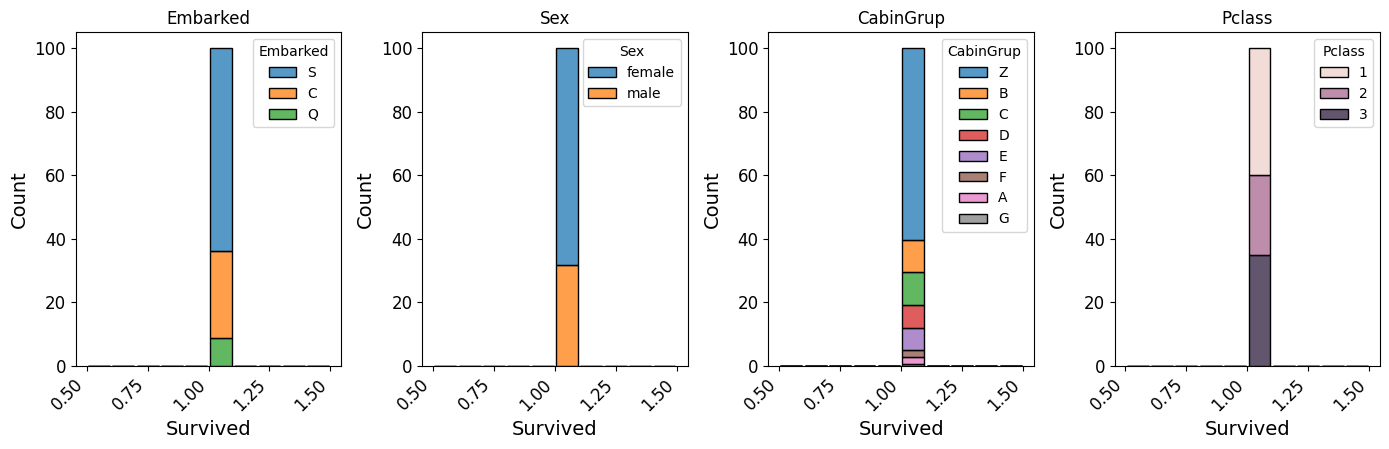

In [55]:
plt.figure(figsize=(14,8))
da.plotPositiveTargetByCats(df, cats, "Survived", subplot_tpl=(2,4),pos_label=1);

Yorumlar

Kurtulanların çoğunluğu;

- Kadın
- Southamptondan binenler
- Kabin numarası bilinmeyenler

Her bir kategorik feature ve numerik feature çifti için target'ın ortalama değerlerine bakalım.

Plots for Age,
----------------------


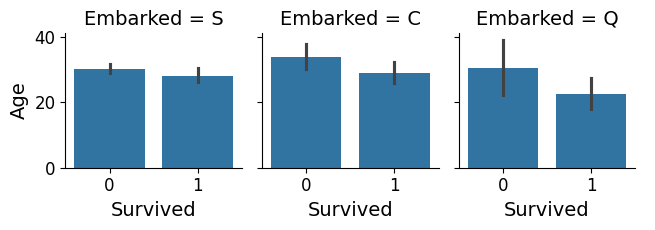

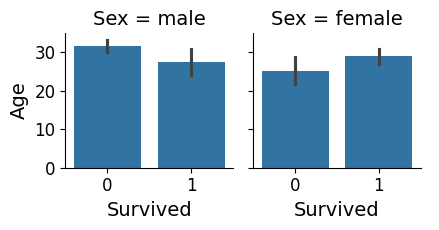

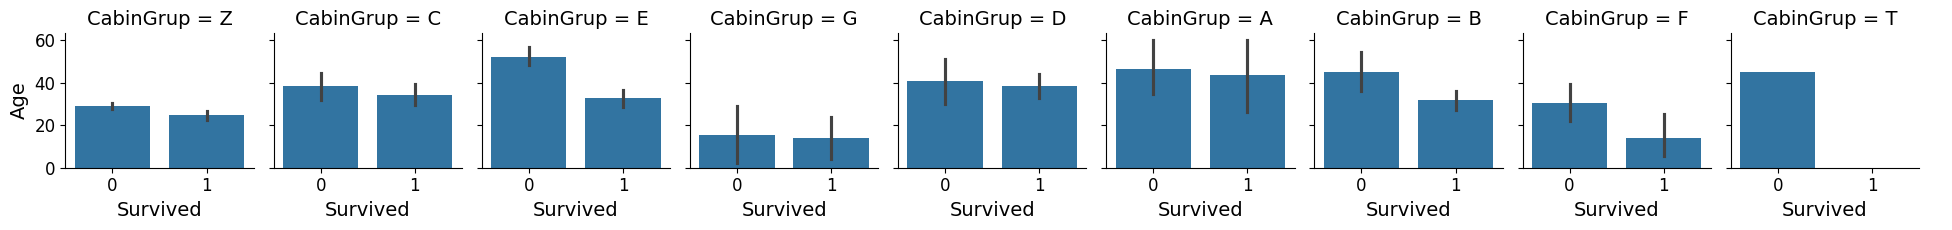

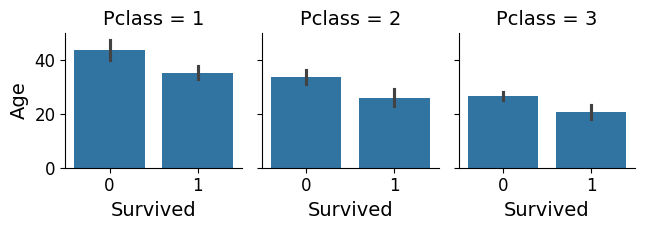

Plots for SibSp,
----------------------


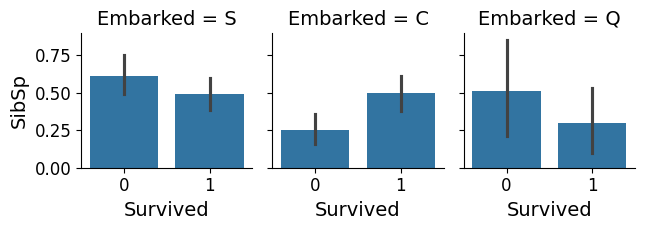

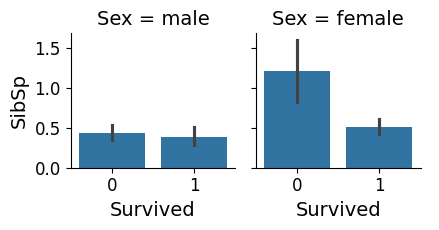

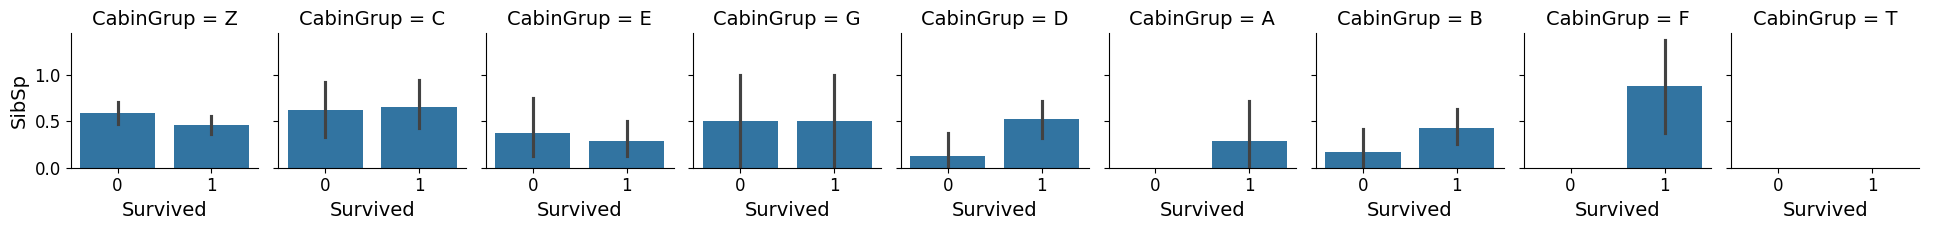

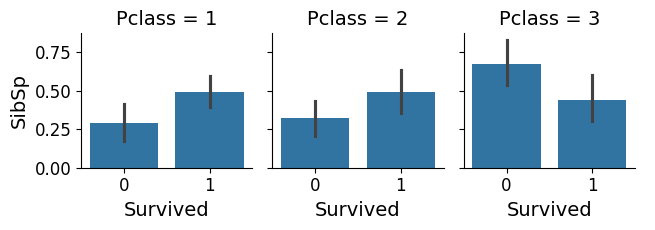

Plots for Parch,
----------------------


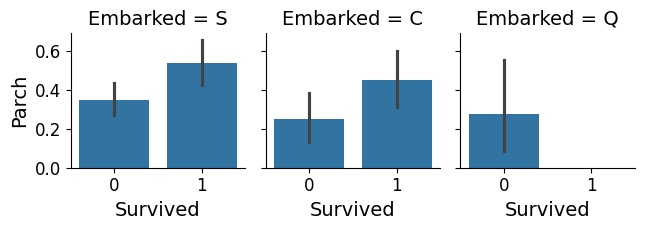

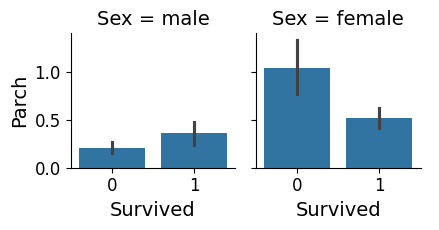

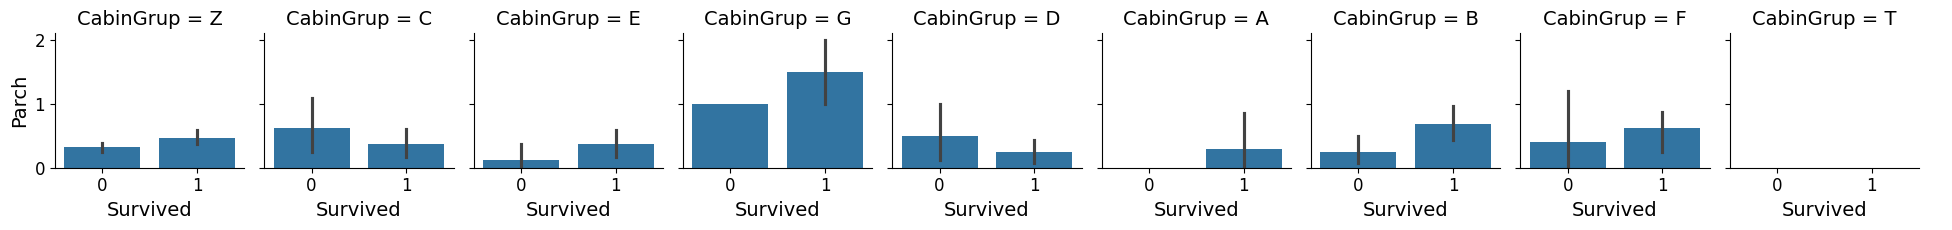

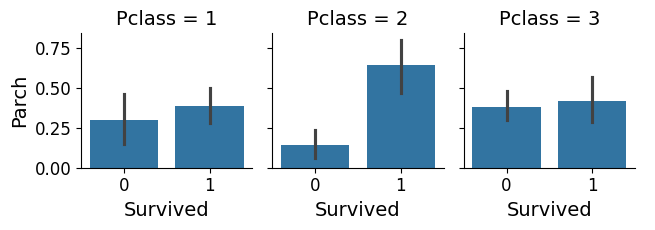

Plots for Fare,
----------------------


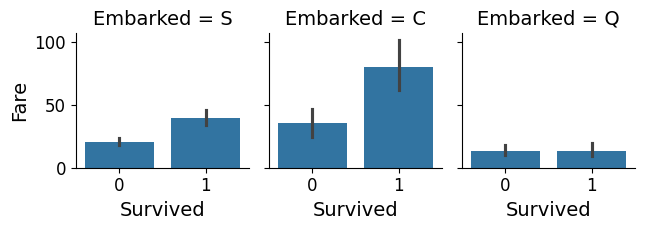

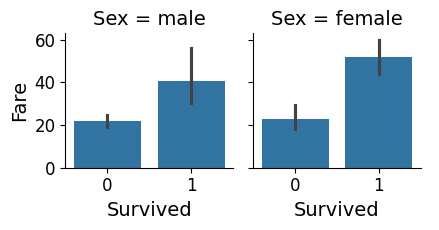

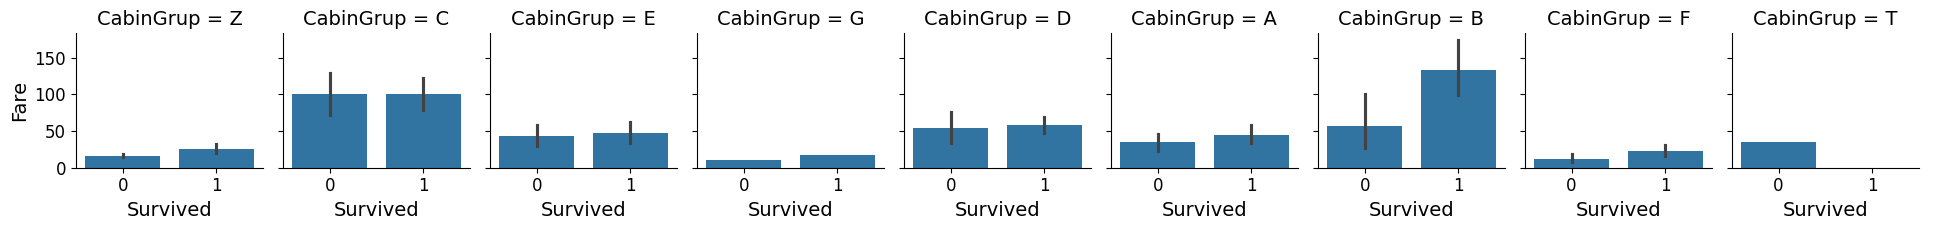

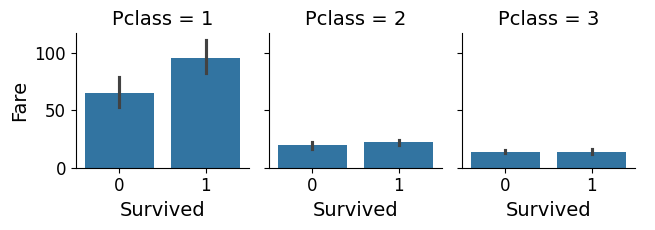

In [56]:
da.plotTargetForNumCatsPairs(df,nums,cats,"Survived",2.4,0.9)

Son olarak da targetın diğer kategoriler bazında ortalama numerik değerlerine bakalım

Plots for Age,
----------------------


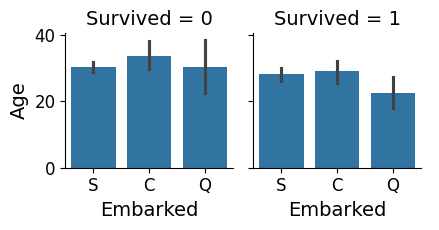

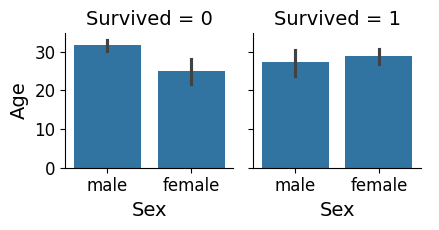

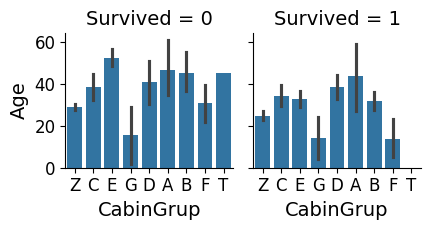

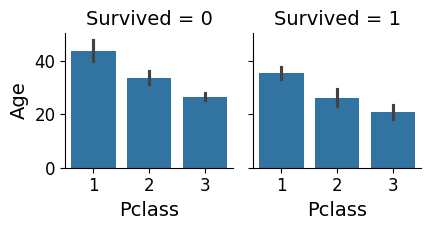

Plots for SibSp,
----------------------


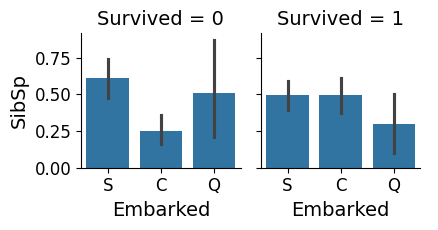

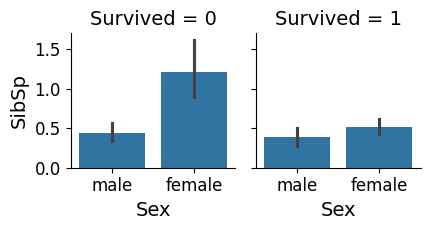

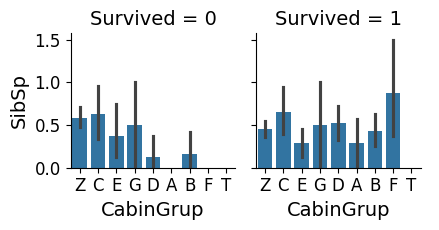

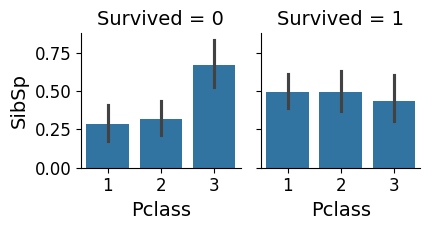

Plots for Parch,
----------------------


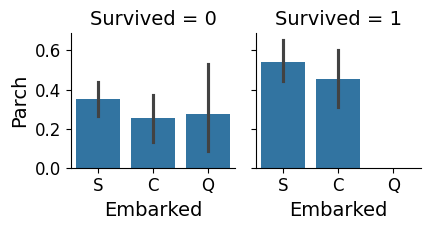

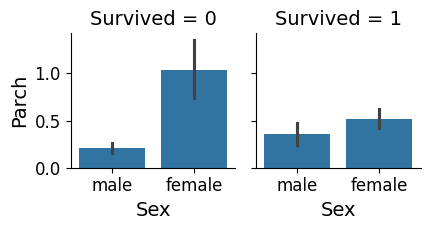

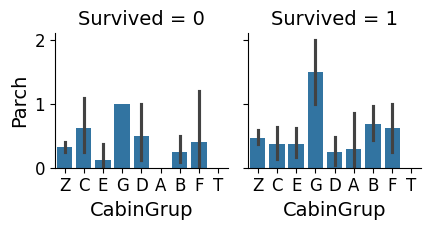

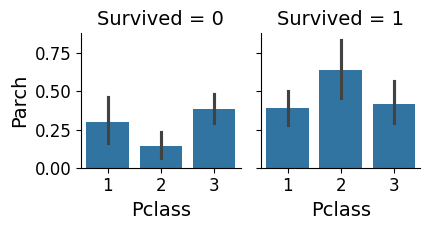

Plots for Fare,
----------------------


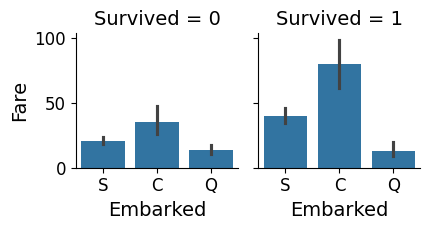

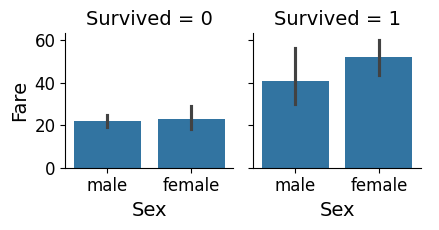

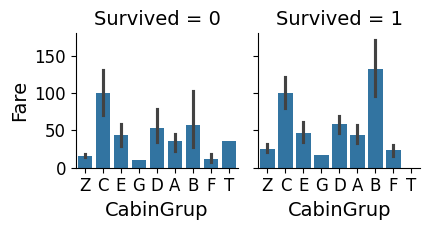

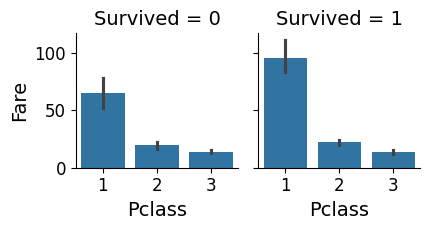

In [57]:
da.plotCategoricForNumTargetPairs(df,nums,cats,"Survived",2.4,0.9)

Bunları yorumlamayı size bırakıyorum.

#### Surival'ın iki yüzü

Farkettiyseniz, hangi yönden baktığınıza göre rakamlarda çelişki, veya açıklaması zor bir durum varmış gibi görünüyor. Burada aslıdna iki ayrı durum var: **Kurtulma oranı(pozitiflerin yüzdesi)** ve **Kurtulanların(pozitiflerin) mutlak rakamı**. Şimdi bunlardan embark noktasına göre bir detay inceleme yapalım.

In [58]:
df.groupby("Embarked")["Survived"].value_counts(normalize=True).to_frame().join(
df.groupby("Embarked")["Survived"].value_counts().to_frame())

proportion  count
Embarked Survived                   
C        1           0.553571     93
         0           0.446429     75
Q        0           0.610390     47
         1           0.389610     30
S        0           0.663043    427
         1           0.336957    217

Görüldüğü üzere Southampton'dan binenler sayıca zaten fazla olduğu için, toplam kurtulanlar içinde bunların sayısının ve oranının fazla olması da gayet normal. Cherbourg'dan binenlerin yarıdan fazlasının kurtulması ise esas odaklanılması gereken şey. Orada muhtemelen ya bu datasetteki başka bir featurela açıklanan bir durum vardır(fare, class gibi), ki bu zaten multicollinearity'ye işarettir, bunu incelemeyi size bırakıyorum(Burada chi2 testi arkadaşınız olacak). yahut da burda olmayan bir bilgi de bu durumu açıklayabilirdi, ör: uçuk bir hipotezle geleyim, o bölgede yaşayanlar Rus asıllıdır ve Ruslar da soğuk suya dayanıklı olduğu için kurtulmuşlardır :)

Benzer analizi diğer featurelar üzerinden de yapabilirsiniz.

## Varsayımların kontrolü

Varsayımları yukarıda görmüştük. Çok kritik varsayımlar olmadığı ve genel kullanılan bi dataseti olduğu için pas geçiyorum.

# Instance(Veri miktarı) kontrolü 

Yeterli sayıda instance(satır/kayıt) var mı kontrolü ve/veya kolon sayısı çok mu? (ML modeli kuracaksak)

- Çok az satır varsa daha fazla veri toplanması sağlanmalıdır
- Aşırı çok satır varsa kısmi sampling yapılabilir.(Detayları göreceğiz)
- Data çokluğundan emin değilseniz tamamıyla deneyin. Eğitim süresi çok uzun sürüyorsa aşamalı olarak azaltabilirsiniz.

In [59]:
len(df)

891

Bu bilgi bize hangi modelleri kullanmamız konusunda ilk ipucunu da verecek:

- az veri:  high-bias/low-variance classifier (e.g. Naive Bayes, LogReg, Lineer SVM, k-NN(büyük k ile), Decision Tree(max_depth küçük,min_samples_leaf üyük), LDA/QDA). Neden?
- çok veri: low-bias/high variance classifier. Neden?

# Feature miktarı kontrolü

Yeterli sayıda kolon var mı ve/veya kolon sayısı çok mu? (ML modeli kuracaksak)
- Az kolon(feature) varsa yenileri temin edilmeye çalışılabilir
- Çok kolon varsa çeşitli boyut indirgeme ve önemli kolonları seçme yöntemleri uygulanır(Detayları sorna göreceğiz)
- Yine satırlardaki aynı mantıkla çok kolon olup olmadığında emin değilseniz önce tümüyle birlikte modelleme yapılır. Eğitim süresi uzun ise veya overfitting oluyorsa feature azaltma yöntemleri uygulanabilir.

Kolon sayısını azaltma sadece eğitim zamanını kısatlmakla kalmaz aynı zamanda overfittingi de engeller.

In [60]:
len(df.columns)-1

8

# Imbalancedness kontrolü

Classification problemiyse, veri setimizin labelları dengeli(balanced) mi? (Imbalanced ise train/test ayrımından sonra oversample yapılır)

In [61]:
df.Survived.value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Hafif bir imbalancencedlık var

## Preparing X,y and train-test splits

Preprocessinge balamadan önce veri setini nasıl böleceğimize karar verelim.

train, test, validation, holdout; Bunların hangileri olacak, veriseti büyüklüğü ve zaman kısıtımıza göre karar veririz.

In [63]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'CabinGrup'],
      dtype='object')

In [64]:
X=df.iloc[:,1:]
y=df.iloc[:,0].values

In [65]:
#if imbalanced add stratify=y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42,stratify=y)

In [66]:
list(map(np.shape, (X_train, X_test, y_train, y_test)))

[(668, 8), (223, 8), (668,), (223,)]

In [67]:
list(map(type, (X_train, X_test, y_train, y_test)))

[pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 numpy.ndarray,
 numpy.ndarray]

(Opsiyonel) df, X ve y'yi silelim ki yanlışlıkla onları kullanmayalım

In [ ]:
del X
del y
del df

# Preprocessing işlemleri

<a href="https://mvolkanyurtseven.medium.com/makine-%C3%B6%C4%9Frenimi-felsefesi-6-dac29cd0df59">Detay işlem sırası</a>

Normalde bu aşamalr pipeline içine yedirilir. Biz açık açık görmek için şimdilik geçici olarak yapacağız. pipeline çinde X_train v.s yeniden oluşturup ilerleyeceğiz.

- data cleaning(Kirli data hep gelecekse, bu da pipeline içine konur, aksi halde tek seferde bitirilir)
- imputation(missing value handling) veya deletion: outlier treatten önce olmalı, IQR’ları etkiliyor
- outlier handling (Scalingden önce olmalı)
gerekiyorsa discretization(onehot öncesinde yapılmalı, ki bunlar da encode olabilsin)
feature creation/extraction
feature selection/dimension reduction
encoding(categoricler için sırası çok kritik değil, ordinallerse scalingden önce olabilir)
distribution transform for skewed data(scaling öncesinde yapmak lazım ki normal dağılıma uygun hale gelsin)
scaling
ovesampling/undersampling for imbalanced data (bu notebookta yapmayacağız)

## Data cleaning

Kirli data hep gelecekse, bu da pipeline içine konur, aksi halde tek seferde bitirilir.

- Mükerrer kayıtları silme
- Hatalı kayıtları silme
veri kalitesi problemlerini düzeltme(veri yönetişimi/data governance çalışmaları önemli):
- “Direkt Bnk”, “Direkt Bank”, “DIREKT Bank.”
- A kolonu B’den büyük olmaması gerektiği halde durum buysa
- A kolonunda bulunmaması gereken değerler varsa (Ör:il kodlarında 89, sıcaklık değeri olarak 500)
- Dönüşüm işlemleri. Ör: 100 TL → 100
- Veri tipi dönüştürme (str-->int v.s)

In [68]:
#duplicate check for rows
len(X_train)-len(X_train.duplicated(keep=False)) #tüm verisetinde de yapılabilirdi

0

In [69]:
#duplicate check for columns
len(set(X_train.columns))-len(X_train.columns)

0

In [70]:
#numeric borders, check the min-max
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,668.000000,537.000000,668.000000,668.000000,668.000000
mean,2.312874,29.931881,0.464072,0.375749,31.177469
std,0.831906,14.455975,0.999353,0.832877,47.457877
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,29.000000,0.000000,0.000000,13.860400
75%,3.000000,39.000000,1.000000,0.000000,30.500000
max,3.000000,80.000000,8.000000,6.000000,512.329200


Age kolonunda min değer biraz garip görünüyor, bu bir bebek olabilir, bakalım yaşı 1den küçük kaç yolcu var

In [71]:
X_train[X_train.Age<1]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinGrup
831,2,male,0.83,1,1,18.7500,S,Z
78,2,male,0.83,0,2,29.0000,S,Z
305,1,male,0.92,1,2,151.5500,S,C
755,2,male,0.67,1,1,14.5000,S,Z
803,3,male,0.42,0,1,8.5167,C,Z
469,3,female,0.75,2,1,19.2583,C,Z


Bunların hepsini bebek gibi düşünebiliriz, ve belki de outlier capping yapıp yaşı 2'den küçük tüm çocukları 2 yapabilriiz.

yukarıda low-cardinalitysi olan featureların unique valuelarına tekrar bakalım, anormal bir değer var mı, görelim. (Yok)

In [72]:
#veri tipleri beklendiği gibi mi: para birimi v.s var mı diye de bakalım
X_train.super_info_()

,Type,Nunique(Excl.Nulls),#of Missing,MostFreqItem,MostFreqCount,486
Pclass,int64,3,0,3,368,1
Sex,object,2,0,male,434,female
Age,float64,85,131,22.0,25,35.0
SibSp,int64,6,0,0,470,1
Parch,int64,7,0,0,516,0
Fare,float64,220,0,7.8958,31,90.0
Embarked,object,4,2,S,479,S
CabinGrup,object,9,0,Z,522,C


## imputation

In [73]:
# missing kontrolü
X_train.isnull().values.any() # NA/null değer var mı kontrol edilir. df.isnull().any().sum() # kaç kolonda null var
X_train.isnull().sum() #Varsa kaç adet olduğunu görmek için
X_train.isnull().all().sum() #tüm kolonu null olan var mı


np.True_

Pclass         0
Sex            0
Age          131
SibSp          0
Parch          0
Fare           0
Embarked       2
CabinGrup      0
dtype: int64

np.int64(0)

In [74]:
nullcols=X_train.columns[X_train.isnull().any()].tolist()
X_train[nullcols].describe(include="all")

,Age,Embarked
count,537.000000,666
unique,NaN,3
top,NaN,S
freq,NaN,479
mean,29.931881,NaN
std,14.455975,NaN
min,0.420000,NaN
25%,21.000000,NaN
50%,29.000000,NaN
75%,39.000000,NaN


pipeline içinde Imputer sınıfı kullanacağız, basitlik olması adına fillna yapalım

In [75]:
X_train.Age = X_train.Age.fillna(X_train.Age.median())
X_train.Embarked = X_train.Embarked.fillna(X_train.Embarked.mode()[0])

## Outlier handling

Age fe Fare için yapabiliriz demiştik. Örnek olması adına Fare için yapalım

In [76]:
#Fare kolonunda 300den büyükleri 300 yapalım
X_train.Fare=X_train.Fare.map(lambda x:300 if x>300 else x) #np.where(df.Fare>300,300,df.Fare)
X_train.Fare.max()

np.float64(300.0)

## Discretization

In [78]:
for o in X_train.select_dtypes("O").columns:
    print(X_train[o].value_counts())

Sex
male      434
female    234
Name: count, dtype: int64
Embarked
S    481
C    133
Q     54
Name: count, dtype: int64
CabinGrup
Z    522
C     38
B     32
E     25
D     24
A     13
F     10
G      3
T      1
Name: count, dtype: int64


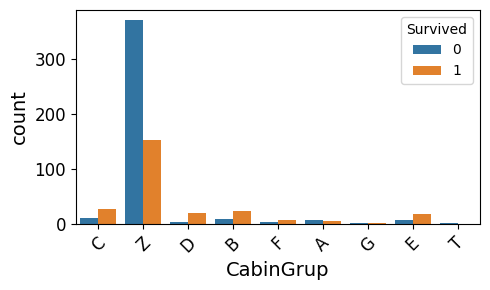

In [79]:
#belki CabinGroup grubplanabilir
plt.figure(figsize=(5,3))
tempdf=pd.concat([X_train, pd.Series(y_train, index=X_train.index, name='Survived')], axis=1)
#draw a stackplot for CabinGroup vs Survived

sns.countplot(x='CabinGrup', hue='Survived', data=tempdf)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

## feature creation/extraction

Yukarıda CabinGroup yaratmıştık, şuan için ayrı birşey yapmayalım

## feature selection

birşey yapmıyoruz

## Feature Encoding (OHE v.s)

pipeline içinde OneHotEncoder, burada pd.getdummies

In [80]:
ords #
# Unique items in column Pclass
# [3 1 2]


['Pclass']

In [88]:
dummmies = pd.get_dummies(X_train[list(noms)],drop_first=True,dtype=int)
nomsuz = X_train.loc[:,X_train.columns.difference(noms)]
X_train_with_dummies=pd.concat([nomsuz,dummmies],axis=1)
X_train_with_dummies.shape
X_train_with_dummies.head()

(668, 16)

,Age,Fare,Parch,Pclass,SibSp,CabinGrup_B,CabinGrup_C,CabinGrup_D,CabinGrup_E,CabinGrup_F,CabinGrup_G,CabinGrup_T,CabinGrup_Z,Embarked_Q,Embarked_S,Sex_male
486,35.0,1.959041,0,1,1,0,1,0,0,0,0,0,0,0,1,0
238,19.0,1.060698,0,2,0,0,0,0,0,0,0,0,1,0,1,1
722,34.0,1.146128,0,2,0,0,0,0,0,0,0,0,1,0,1,1
184,4.0,1.362200,2,3,0,0,0,0,0,0,0,0,1,0,1,0
56,21.0,1.060698,0,2,0,0,0,0,0,0,0,0,1,0,1,0


## Feature Transformation

In [85]:
X_train_with_dummies["Fare"]=np.log10(X_train_with_dummies["Fare"]+1)

## Scaling

In [91]:
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train_with_dummies) #oheden önce mi sonra mı?
X_train_scaled[0]

array([ 0.40533335,  1.63095943, -0.4514834 , -1.5793344 ,  0.53667675,
       -0.22430886,  4.07172536, -0.19304684, -0.19718075, -0.12327842,
       -0.06716605, -0.03872015, -1.8908576 , -0.29656008,  0.62351695,
       -1.36187402])

## Oversampling/Undersampling (if imbalanced)

## Dimension reduction

# Modelleme

Logistic Regression ile birlikte benzer mantıkta çalışan birkaç classfiera daha bakacağız.

In [92]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr.score(X_train_scaled, y_train) #eğitim skoru

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

0.8143712574850299

### Model değerlendirme(evaluation)

In [98]:
#öncelikle X_test üzerinde preprocessingleri yapalım; DİKKAT: bilgi train'den gelmeli
X_test.Age = X_test.Age.fillna(X_train.Age.median()) 
X_test.Embarked = X_test.Embarked.fillna(X_train.Embarked.mode()[0])

X_test.Fare = X_test.Fare.map(lambda x:300 if x>300 else x) #burda bilgi train'den dolaylı gelmiş oldu

dummmies = pd.get_dummies(X_test[list(noms)], drop_first=True, dtype=int)
nomsuz = X_test.loc[:, X_test.columns.difference(noms)]
X_test_with_dummies = pd.concat([nomsuz, dummmies], axis=1)

# DİKKAAAAAAAT
# ensure same dummy columns/order as in training set
# add missing columns with zeros and drop unexpected extras
missing_cols = set(X_train_with_dummies.columns) - set(X_test_with_dummies.columns)
for c in missing_cols:
	X_test_with_dummies[c] = 0
extra_cols = set(X_test_with_dummies.columns) - set(X_train_with_dummies.columns)
if extra_cols:
	X_test_with_dummies = X_test_with_dummies.drop(columns=list(extra_cols))
# reorder columns to match training
X_test_with_dummies = X_test_with_dummies[X_train_with_dummies.columns]

X_test_with_dummies["Fare"] = np.log10(X_test_with_dummies["Fare"] + 1)

X_test_scaled = ss.transform(X_test_with_dummies) #only transform, no fit

#### Confusion Matrix ve Classification Report

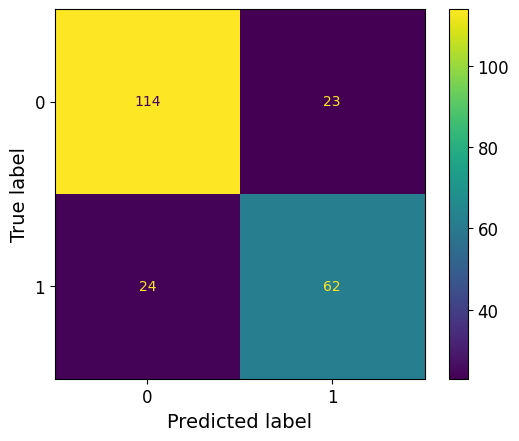

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred=lr.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm,display_labels=lr.classes_).plot();

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       137
           1       0.73      0.72      0.73        86

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



#### Learning Curve

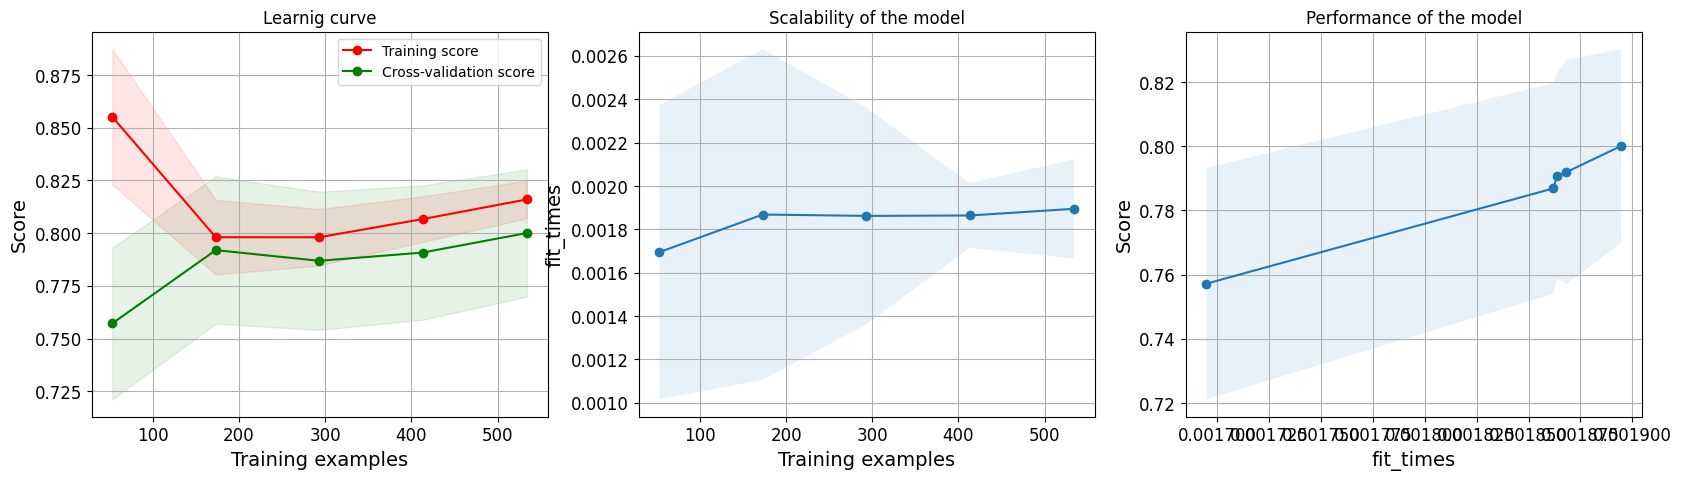

In [103]:
mycv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
ml.plot_learning_curve(lr,"Learnig curve",X_train_scaled,y_train,cv=mycv)

**Learnig curve**

Bu grafik, eğitim örneklerinin sayısı arttıkça hem eğitim puanının hem de cv skorunun nasıl geliştiğini gösterir.

<font color="red">**Eğitim skoru (kırmızı çizgi)**</font>: Başlangıçta model, az sayıda veri olduğundan eğitim verileri üzerinde çok iyi performans gösterirken test verisinde kötü performans gösteriyor yani overfit ediyor. Veri miktarı arttıkça, modelin genelleştirilebilecek daha fazla verisi olması ve eğitim setinde daha az "ezberlenmesi" nedeniyle eğitim skorunun artış hızı yavaşlar.

<font color="green">**cv skoru (yeşil çizgi)**</font>: Başlangıçta cv puanı eğitim puanından düşük; bu, modelin az miktarda veri üzerinde eğitildiğinde iyi genelleme yapmakta zorlandığını gösteriyor. Ancak eğitim örneklerinin sayısı arttıkça cv skoru ve eğitim ile cv skorları arasındaki fark daralır.

**Yorum**: Eğitim ve cv skorları arasındaki fark azaldıkça model daha fazla eğitim örneğinden yararlanır. cv skoru 0,8 civarında sabitleniyor ve bu da modelin daha iyi genelleme yaptığını gösteriyor.
Sonunda eğitim ve doğrulama puanları arasındaki hafif fark, bir miktar bias'a işaret ediyor, ancak bu ciddi bir fark değil. Model genel olarak iyi performans gösteriyor ve veri hacmi büyüdükçe skor da artıyor, demek daha fazla veri olsa daha iyi sonuçlar alacağız, ancak bu veriseti özelinde öyle birşey mümkün değil :)

**Modelin Ölçeklenebilirliği**

Bu grafik, eğitim örneklerinin sayısı arttıkça eğitim süresinin (modeli eğitmek için gereken süre) nasıl değiştiğini gösterir. Eğitim örneklerinin sayısı arttıkça modeli eğitmek için gereken süre de artar; bu beklenen bir davranıştır. Bizim veri seti özelinde ise eğitim sürelerindeki artışın üstel değil kademeli olduğu görülüyor; bu da modelin ölçeklenebilir olduğunu ve eğitim süresinde dramatik bir artış olmadan daha büyük veri kümelerini işleyebileceğini gösteriyor.

#### ROC ve ROC-AUC

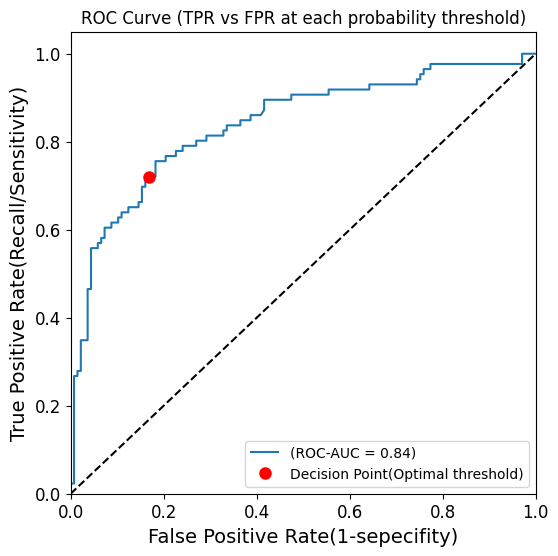

In [104]:
#if not imbalanced
ml.plotROC(y_test, X_test_scaled, lr, pos_label=1)

**ROC Eğrisinin Bileşenleri:**

Y ekseni(True Pozitif Oranı): Bu, modelin doğru bir şekilde pozitif olarak tanımladığı gerçek pozitiflerin oranını gösterir. Gerçek pozitiflerin toplam gerçek pozitif sayısına oranıdır (TP / (TP + FN)).

X ekseni(False Pozitif Oranı: Bu, yanlışlıkla pozitif olarak tanımlanan gerçek negatiflerin oranını ölçer. False pozitiflerin toplam gerçek negatif sayısına oranıdır (FP / (FP + TN)).

Çapraz kesikli diagonal çizgi: Bu, tahmin gücü olmayan rastgele bir sınıflandırıcının performansını temsil eder. Bu doğrultuda performans gösteren bir model, rastgele tahminden daha iyi olmayacaktır (AUC = 0,5).

<font color="blue">Mavi çizgi (ROC eğrisi)</font>: Bu, threshold değiştikçe gerçek pozitif oranın ve yanlış pozitif oranının nasıl değiştiğini temsil eder. Sınıflar arasında ayrım yapmada iyi olan bir model, bu eğriyi grafiğin sol üst köşesine yaklaştıracaktır.

Genel Yorum:

Eğri sol üst köşeye doğru eğilir; bu, modelimizin pozitif ve negatif sınıfları ayırt etme konusunda iyi bir yeteneğe sahip olduğunu gösteriyor. Çok fazla False Pozitif ortaya çıkmadan yüksek bir True Pozitif oranına ulaşmışız.

AUC'un 0,84 olması güzel bir sonuçtur ve modelimizin iyi bir ayrım gücüne sahip olduğunu gösterir. Bu, negatifleri pozitif olarak yanlış sınıflandırmasından çok daha sık olarak pozitif sınıfı doğru bir şekilde tanımlayabildiği anlamına gelir.

<font color="red">Optimum eşik (kırmızı nokta)</font>, True pozitif oran ile False pozitif oran arasında bir denge olduğunu gösterir. Bu eşikte model, hala çok sayıda gerçek pozitif yakalamaya devam ederken, yanlış pozitifleri en aza indirme açısından iyi bir performans sergiliyor. Bu muhtemelen hedefinize bağlı olarak nihai karar eşiğinizi belirleyeceğiniz yerdir (örneğin, yanlış pozitifleri en aza indirmek veya gerçek pozitifleri maksimuma çıkarmak).   

In [105]:
from sklearn.metrics import roc_curve

# Get the FPR, TPR, and thresholds from the ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

# Calculate the area under the ROC curve (AUC)
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))

# 1. Youden's J statistic: maximize TPR - FPR
J = tpr - fpr
optimal_idx = np.argmax(J)
optimal_threshold_youden = thresholds[optimal_idx]

# 2. Minimum distance to the top-left corner (TPR=1, FPR=0)
distances = np.sqrt((1 - tpr)**2 + fpr**2)
optimal_idx_distance = np.argmin(distances)
optimal_threshold_distance = thresholds[optimal_idx_distance]

print(f"Optimal threshold by Youden's J: {optimal_threshold_youden}")
print(f"Optimal threshold by min distance: {optimal_threshold_distance}")


0.7765235104396537
Optimal threshold by Youden's J: 1.0
Optimal threshold by min distance: 1.0


#### PR-Recall ve PR-AUC

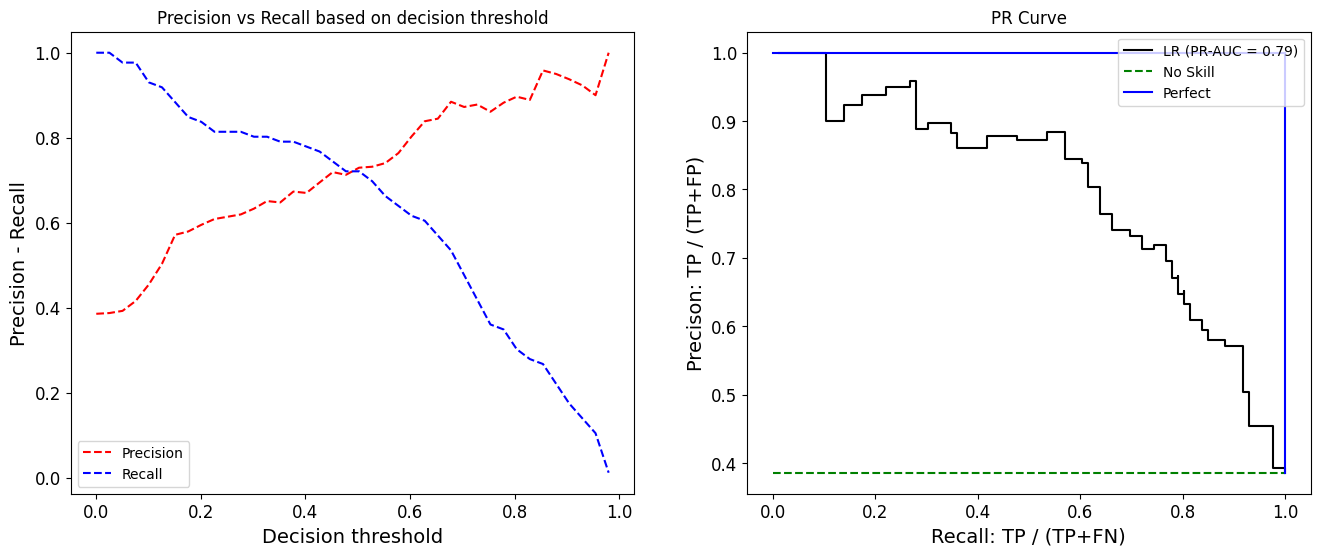

In [107]:
ml.plot_precision_recall_curve(y_test, X_test_scaled, lr)

Bu Precision-Recall eğrisi şu şekilde yorumlanabilir:

**Sol Grafik**: Bu grafik, threshold değiştikçe precision ve recall'un nasıl değiştiğini gösterir.

<font color="red">Precision</font>: Threshold arttıkça preciison genellikle artar çünkü model olumlu tahminlerine daha fazla güvenir. Ancak eşik değeri 1'e yaklaştıkça, olumlu tahminlerin sayısındaki azalma nedeniyle kesinlik düşebilir.

<font color="blue">Recall</font>: Threshold arttıkça recall azalma eğilimindedir. Bunun nedeni, threshold daha katı hale geldikçe (daha yüksek), daha az pozitif vakanın tahmin edilmesi ve bunun da daha fazla False Negatif'e yol açmasıdır.

Eğrilerin kesişme noktası (0,6 civarında) precision ile recall arasında bir dengeyi gösteriyor. Bu bölge etrafında bir threshold seçmeyi veya birini diğerine göre önceliklendirmeyi tercih edebiliriz.

**Sağ Grafik**: Bu grafik, farklı thresholdlar boyunca precison ve recall arasındaki dengeyi gösterir. Siyah çizgi modelimizin gerçek performansını temsil eder; eğrinin altındaki alan (AUC, burada 0.77) genel performansı yansıtır.

**Genel Yorum**: 0,77'lik PR AUC değeri, modelimizin precison ve recall'u arasında iyi bir dengeye sahip olduğunu ve rastgele şanstan daha iyi performans sergilediğini gösteriyor.

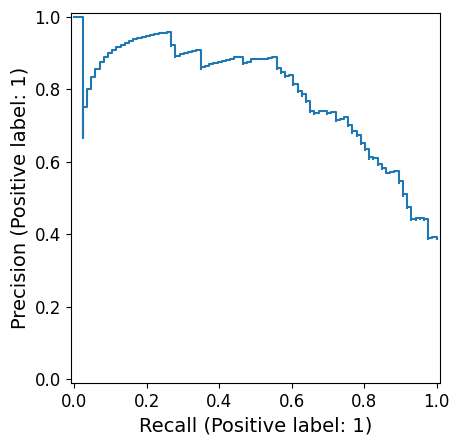

In [108]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
pred_prob = lr.predict_proba(X_test_scaled)
precision, recall, thresholds = precision_recall_curve(y_test, pred_prob[:,1])
PrecisionRecallDisplay(precision, recall,pos_label=1).plot()

#### Gain ve Lift

In [110]:
# ml.plot_gain_and_lift(lr,X_test_scaled,y_test,pos_label=1) #Decile hatasına bakılacak

### En güvenilir modeli kurmak

Not: Eğer işbirimi bizden en güvenilir modeli kurmamızı istiyorsa o zaman accuracy yerine log_loss'a bakarız. Şimdi direkt en düşük log-loss'u elde etmeyi hedefleyecek şekilde modelimizi kuralım(scoring'e neg_log_loss vereceğiz)

### Feature Importance

Normalde, hangi feature'un en çok katkısı olduğunu katsayılar üzerinden anlayabiliyoruz. Tabi yukarıda birkçaz kez ifade ettiğim gibi, multicollinearity olmadığından emin olmak lazım, yoksa bu katsayılar yanlış yorumlanabilir.

Bunun için coef\_ attribute'üne bakmak gerekir. (Genel kültür: bir attribute'ün sonunda "_" varsa, bu bu attribute'ün fit sonrasında oluştuğu anlamına gelir.)

In [113]:
lr.coef_[0]

array([-0.5719904 ,  0.38465375, -0.1088837 , -0.5475082 , -0.35507458,
       -0.06133157, -0.09363644,  0.18158169,  0.16783346,  0.09673459,
       -0.03113042, -0.17327646, -0.29048144,  0.0844767 , -0.15125727,
       -1.2618435 ])

Burada önemli olan bir detay var, o da bu katsayıların one-hot-encoding yapıldıktan sonra elde edilen feature sayısı kadar olduğudur, ilk haldedeki feature sayısı kadar değil.
Toplam etkiyi görmek için bunların mutlak değerlerinin toplamına veya ortalamasına bakılabilir. get_dummies yerine OnehotEncoder kulalnıldığında bakılacak

# Kaynaklar

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html
- https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc
- https://medium.com/analytics-vidhya/your-guide-for-logistic-regression-with-titanic-dataset-784943523994
- https://www.kaggle.com/code/mnassrib/titanic-logistic-regression-with-python/notebook
- https://www.analyticsvidhya.com/blog/2021/07/titanic-survival-prediction-using-machine-learning/
- https://becominghuman.ai/titanic-survival-dataset-part-2-2-logistic-regression-7ebe9e30bf54